In [2]:
!pip install pandas-datareader
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22415 sha256=d5026efdb4cfed4e8dc9121cfc5854c2bf3001f869b9b303b7d3956bce425c7f
  Stored in directory: C:\Users\GUILHE~1.ANG\AppData\Local\Temp\pip-ephem-wheel-cache-87hpjgw3\wheels\28\79\3c\08a301b673366fe664fe2853e136eb2acc1bb752045c11c6a1
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8374 sha256=011d89a71ebd21dc12b22789b4ea712ea6dcb8469b8954538790601a799a3218
  Stored in directory: C:\Users\GUILHE~1.ANG\AppData\Local\Temp\pip-ephem-wheel-cache-87hpjgw3\wheels\ae\25\47\4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf

yf.pdr_override()

## Obtendo os dados do mercado

In [13]:
ibov = web.get_data_yahoo("^BVSP")


[*********************100%***********************]  1 of 1 completed


In [14]:
type(ibov)

pandas.core.frame.DataFrame

In [15]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0
1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0
1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0


In [16]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-30,105605.0,105607.0,103920.0,105009.0,105009.0,9591700
2020-07-31,105010.0,105462.0,102642.0,102912.0,102912.0,12929300
2020-08-03,102913.0,103863.0,102304.0,102830.0,102830.0,10901000
2020-08-04,102826.0,103012.0,100005.0,101216.0,101216.0,12029800
2020-08-05,101220.0,103763.0,101220.0,102802.0,102802.0,10922100


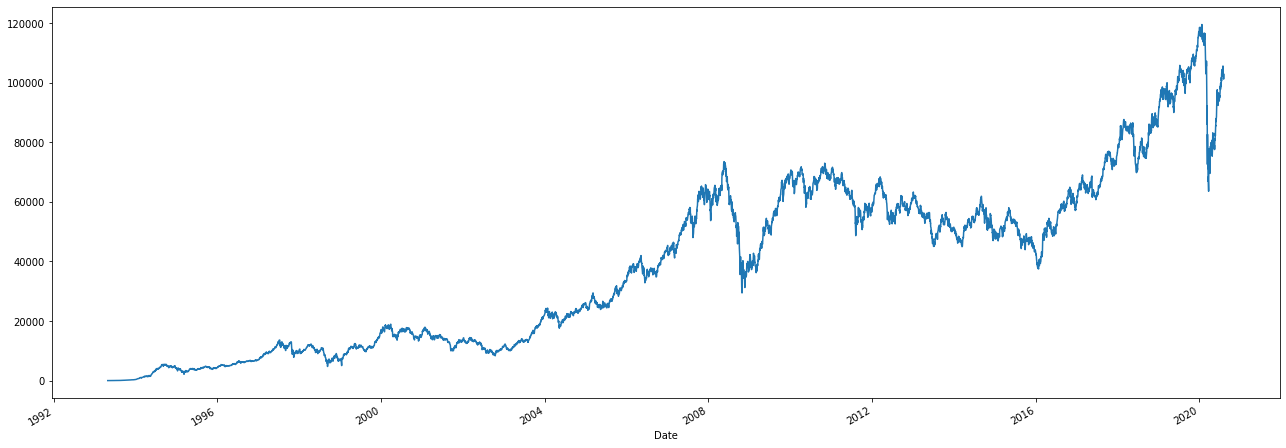

In [18]:
ibov['Close'].plot(figsize=(22,8))